In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fft import fft, fftfreq , ifft , fftshift

fourier transform of 1D heat equation
\begin{equation}
u(x,t) = \int_{-\infty}^{\infty} \frac{e^{-(x-y)^2/{4\alpha^2 t}}}{2\alpha \ sqrt(\pi t)} f(y) \,dy
\end{equation}
gaussian diffusion:
\begin{equation}
\frac{e^{-(x-y)^2/{4\alpha^2 t}}}{2\alpha \ sqrt(\pi t)}
\end{equation}

with numerical integral

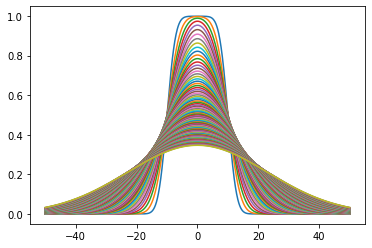

In [50]:
dx = 0.1
N = 1000
L = N*dx
x = np.linspace(-L/2, L/2, N)

f = 0 * x
f[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)] = 1

a = 5
y = x.copy()
dt = 0.1
u = np.zeros(N)
for i in range(1 ,  100):
    t = i*dt
    
    # for every fixed x:
    for j in range(N):
        xi = x[j]-y
        gxy = (1/(2*a*np.sqrt(np.pi*t)))*np.exp(-xi**2/(4*a*a*t))
        # integrate gxy*f for every x
        u[j] = np.dot(gxy, f)*dx
    
    fig =plt.plot(x, u)
plt.show()
    
        

with fft:

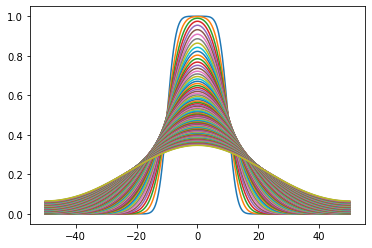

In [79]:
dx = 0.1
N = 1000
L = N*dx
x = np.linspace(-L/2, L/2, N)

f = 0 * x
f[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)] = 1

a = 5
fhat = fft(f)
dt = 0.1
# array of frequencies
kappa = fftfreq(N, d=1/N) * (2*np.pi/L)

for i in range(1 ,  100):
    t = i*dt
    uhat = np.exp(-(a**2)*(kappa**2)*t) * fhat
    u = ifft(uhat)
    plt.plot(x, abs(u))
    
plt.show()
    